# Предсказание коэффициента восстановления золота

#### Тема проекта:
- Предсказание коэффициента восстановления золота из золотосодержащей руды

#### Цель:
- Построить модель, предсказывающую значение коэффициента восстановления золота

#### Поставленные задачи:
- Изучить предоставленные данные;
- Проверить расчёт эффективности обогащения;
- Проанализировать признаки, недоступные в тестовой выборке;
- Изучить концентрации металлов на различных этапах очистки;
- Сравнить распределения размеров гранул сырья;
- Исследовать суммарную концентрацию веществ в концентратах;
- Написать функцию для вычисления итоговой метрики SMAPE;
- Обучить и протестировать несколько моделей, сравнить значения SMAPE.

#### Краткий план работы:
- [Шаг 1. Подготовка данных](#Шаг-1.-Подготовка-данных)
  - [1.1. Открытие и изучение данных](#1.1.-Открытие-и-изучение-данных)    
  - [1.2. Проверка расчёта эффективности обогащения](#1.2.-Проверка-расчёта-эффективности-обогащения)  
  - [1.3. Анализ признаков, недоступных в тестовой выборке](#1.3.-Анализ-признаков,-недоступных-в-тестовой-выборке)  
- [Шаг 2. Исследование данных](#Шаг-2.-Исследование-данных)
  - [2.1. Изучение концентрации металлов на различных этапах очистки](#2.1.-Изучение-концентрации-металлов-на-различных-этапах-очистки)
  - [2.2. Сравнение распределения размеров гранул сырья](#2.2.-Сравнение-распределения-размеров-гранул-сырья)  
  - [2.3. Исследование суммарной концентрации веществ в концентратах](#2.3.-Исследование-суммарной-концентрации-веществ-в-концентратах)  
- [Шаг 3. Обучение и проверка моделей](#Шаг-3.-Обучение-и-проверка-моделей)   
  - [3.1. Написание функции для вычисления итоговой метрики SMAPE](#3.1.-Написание-функции-для-вычисления-итоговой-метрики-SMAPE)
  - [3.2. Обучение и тестирование](#3.2.-Обучение-и-тестирование)
  
#### Вывод:
- Изучены предоставленные данные;
- Рассмотрены все исследовательские вопросы;
- Обучено и протестировано несколько моделей;
- Для моделей проведено сравнение итоговой метрики SMAPE.

**Статус проекта**: проект завершён.  

**Используемые библиотеки**: *numpy*, *pandas*, *matplotlib*, *seaborn*, *itertools*, *sklearn*  

**Источник данных**: [курс Data Science от Яндекс.Практикум](https://praktikum.yandex.ru/profile/data-scientist/)

In [1]:
# отключение предупреждений
import warnings
warnings.filterwarnings('ignore') 

# импорт библиотек и функция для дальнейшей работы
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

## Шаг 1. Подготовка данных

Последовательно рассмотрим каждую из задач:
- [1.1. Открытие и изучение данных](#1.1.-Открытие-и-изучение-данных)    
- [1.2. Проверка расчёта эффективности обогащения](#1.2.-Проверка-расчёта-эффективности-обогащения)  
- [1.3. Анализ признаков, недоступных в тестовой выборке](#1.3.-Анализ-признаков,-недоступных-в-тестовой-выборке)   

### 1.1. Открытие и изучение данных

Поскольку данные очень громоздкие, вместо написания функции, удобнее будет рассматривать **каждый этап отдельно** для каждой таблицы, чтобы сразу отмечать закономерности.

### 1. Открытие файлов

Данные содержат **замеры** химических и физических характеристик субстанций (сырья, продукта, реагентов) и индексируются **датой и временем** получения информации. Выгрузим все предоставленные данные и посмотрим на первые строки.  

In [2]:
# выгрузка файлов
gold_recovery_train = pd.read_csv('datasets/gold_recovery_train.csv', parse_dates=['date'], index_col='date')
gold_recovery_test = pd.read_csv('datasets/gold_recovery_test.csv', parse_dates=['date'], index_col='date')
gold_recovery_full = pd.read_csv('datasets/gold_recovery_full.csv', parse_dates=['date'], index_col='date')
df_dict = {'обучающая выборка': gold_recovery_train, 'тестовая выборка': gold_recovery_test,
           'исходная выборка': gold_recovery_full}

In [3]:
# вывод первых строк для выборки
print('Обучающая выборка:')
gold_recovery_train.head(3)

Обучающая выборка:


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


In [4]:
# вывод первых строк для выборки
print('Тестовая выборка:')
gold_recovery_test.head(3)

Тестовая выборка:


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


In [5]:
# вывод первых строк для выборки
print('Исходная выборка:')
gold_recovery_full.head(3)

Исходная выборка:


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


**Обучающая** и **тестовая** выборка получены из файла *gold_recovery_full*. Проверим, что это действительно так.  
Сравним количество строк в этих файлах (сумма *train* и *test* должна быть равна *full*).

In [6]:
print('Сумма строк в исходной датасете:', len(gold_recovery_full))
print('Количество строк в обучающей выборке', len(gold_recovery_train))
print('Количество строк в тестовой выборке', len(gold_recovery_test))
print('Сумма train и test:', len(gold_recovery_train) + len(gold_recovery_test))

Сумма строк в исходной датасете: 22716
Количество строк в обучающей выборке 16860
Количество строк в тестовой выборке 5856
Сумма train и test: 22716


### 2. Дубликаты

Проверим данные на наличие **дубликатов** в индексах (датах наблюдений) и строках:

In [7]:
for df_key, df_value in df_dict.items():
    print(f'Результаты ({df_key})')
    print('Количество задублированных дат:', df_value.index.duplicated().sum())
    print('Количество задублированных строк:', df_value.duplicated().sum())
    print()

Результаты (обучающая выборка)
Количество задублированных дат: 0
Количество задублированных строк: 16

Результаты (тестовая выборка)
Количество задублированных дат: 0
Количество задублированных строк: 6

Результаты (исходная выборка)
Количество задублированных дат: 0
Количество задублированных строк: 22



- Есть дубликаты в **наблюдениях**, выведем эти строки:

In [8]:
# вывод строк с дубликатами
gold_recovery_full[gold_recovery_full.duplicated()]

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-03-09 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-09 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-25 18:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-25 19:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-25 22:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-25 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-26 00:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-26 03:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-16 11:59:59,0.000000,0.000000,0.000000,0.00000,NaN,0.00000,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В основном **задублированные строки** - это наблюдения в рамках **одного дня**, причем временной **интервал** между наблюдениями-дубликатами **равен часу**. Возможно, за час ничего не изменилось, поэтому наблюдения идентичны. Или наблюдения задублировались.

Поскольку таких наблюдений не очень много, оставим их. В реальной жизни стоило бы спросить у коллег, с чем могут быть связаны дубликаты.

- Дубликатов в **датах-индексах** нет, это положительный момент.

Проверим, что индексы тестовой и обучающей выборок **входят в индексы исходной выборки** и при этом **не пересекаются** (т. е. в обучающей выборке нет индексов тестовой).

In [9]:
# проверка индексов теста
print(((gold_recovery_test.index).isin(gold_recovery_full.index)).all())
print(((gold_recovery_train.index).isin(gold_recovery_full.index)).all())

# проверка пересечения индексов в обучающей и тестовой выборке
try:
    gold_recovery_train.loc[gold_recovery_test.index.values, :]
except:
    print('В обучающей и тестовой выборке нет совпадающих индексов')

True
True
В обучающей и тестовой выборке нет совпадающих индексов


Всё в порядке, для обучающей и тестовой выборки индексы **уникальны** и взяты из **одной исходной выборки**.  

### 3. Вывод общей информации

Выведем общую информацию по файлам:

In [10]:
# вывод общей информации
for df_key, df_value in df_dict.items():
    print(f'Результаты ({df_key})')
    print(df_value.info())
    print('-'*100)
    print()

Результаты (обучающая выборка)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.outp

- **Обучающая выборка** содержит **16860 строк** (количество замеров) и **86 столбцов** (химические и физические свойства).
- **Тестовая выборка** содержит **5856 строк** и **52 столбца**.
- **Исходная выборка** содержит **22716 строк** и **86 столбцов**.
- **Тип данных** для всех колонок выборок - **float**.
- Во всех выборках присутствуют **пропуски**.

### 4. Пропуски

Исследуем **пропуски** в выборках. Сначала выведем **топ** колонок с самым большим количеством пропусков:

In [11]:
# вывод топ-10 колонок с пропусками
for df_key, df_value in df_dict.items():
    print(f'Результаты ({df_key})')
    print(df_value.isnull().sum().sort_values(ascending=False)[0:10])
    print('-'*100)
    print()

Результаты (обучающая выборка)
rougher.output.recovery               2573
rougher.output.tail_ag                2250
rougher.output.tail_sol               2249
rougher.output.tail_au                2249
secondary_cleaner.output.tail_sol     1986
rougher.input.floatbank11_xanthate    1904
final.output.recovery                 1521
primary_cleaner.input.sulfate         1307
primary_cleaner.input.depressant      1262
rougher.calculation.au_pb_ratio       1242
dtype: int64
----------------------------------------------------------------------------------------------------

Результаты (тестовая выборка)
rougher.input.floatbank11_xanthate          353
primary_cleaner.input.sulfate               302
primary_cleaner.input.depressant            284
rougher.input.floatbank10_sulfate           257
primary_cleaner.input.xanthate              166
rougher.input.floatbank10_xanthate          123
rougher.input.feed_sol                       67
rougher.input.floatbank11_sulfate            55
rougher.in

- Поскольку **обучающая** выборка - это, по сути, срез **исходной** выборки, то неудивительно, что **топ по пропускам** в данных датасетах похож.  
- В обоих случаях лидером является `rougher.output.recovery` - эффективность обогащения чернового концентрата, т. е. та величина, которую требуется спрогнозировать.
- Кажется странным наличие большого количества пропусков в данных по **содержанию веществ в отвальных хвостах** для этапа **после флотации**. Возможно, эти данные не смогли либо забыли замерить, в результате чего и получены пропуски.

Выведем аналогичный **топ с наименьшим количеством пропусков**:

In [12]:
# вывод топ-5 колонок с наименьшим количеством пропусков
for df_key, df_value in df_dict.items():
    print(f'Результаты ({df_key})')
    print(df_value.isnull().sum().sort_values()[0:5])
    print('-'*100)
    print()

Результаты (обучающая выборка)
primary_cleaner.input.feed_size                        0
primary_cleaner.state.floatbank8_c_level              27
primary_cleaner.state.floatbank8_d_level              27
rougher.calculation.sulfate_to_au_concentrate         27
rougher.calculation.floatbank10_sulfate_to_au_feed    27
dtype: int64
----------------------------------------------------------------------------------------------------

Результаты (тестовая выборка)
primary_cleaner.input.feed_size       0
rougher.state.floatbank10_b_level    16
rougher.state.floatbank10_c_level    16
rougher.state.floatbank10_d_level    16
rougher.state.floatbank10_e_level    16
dtype: int64
----------------------------------------------------------------------------------------------------

Результаты (исходная выборка)
primary_cleaner.input.feed_size                   0
primary_cleaner.state.floatbank8_c_level         43
primary_cleaner.state.floatbank8_b_level         43
primary_cleaner.state.floatbank8_d_lev

- Пропуски **отсутствуют** только в одной колонке `primary_cleaner.input.feed_size`, которая означает **размер гранул до первого этапа очистки**.

Проверим, есть ли у нас строки, где **все данные - это пропуски**:

In [13]:
# строки, где данные всего ряда - пропуски
for df_key, df_value in df_dict.items():
    print(f'Результаты ({df_key}):', end=' ')
    if len(df_value) == len(df_value.dropna(how='all')):
        print('строк со всеми пропусками нет')
    else:
        print('есть строки со всеми пропусками')

Результаты (обучающая выборка): строк со всеми пропусками нет
Результаты (тестовая выборка): строк со всеми пропусками нет
Результаты (исходная выборка): строк со всеми пропусками нет


- Таких строк, где были бы **все пропуски, нет**.  

Теперь посмотрим, сколько останется наблюдений, если мы решим удалить все строки, где есть **хотя бы один пропуск**:

In [14]:
# доля, где есть хотя бы один пропуск
for df_key, df_value in df_dict.items():
    print(f'Доля строк с хотя бы одним пропусков ({df_key}):', end=' ')
    print((len(df_value)-len(df_value.dropna()))/len(df_value))

Доля строк с хотя бы одним пропусков (обучающая выборка): 0.34655990510083035
Доля строк с хотя бы одним пропусков (тестовая выборка): 0.08077185792349727
Доля строк с хотя бы одним пропусков (исходная выборка): 0.2915125902447614


- Такое удаление существенно скажется на **обучающей** выборке (уйдёт около 35% наблюдений). Однако число наблюдений будет по-прежнему **достаточным, чтобы обучить модель**.
- На **тестовой** выборке такое удаление практически не скажется.

Удалим строки с пропусками и сохраним изменения в новых датафреймах **без пропусков**, с которыми мы будем работать в дальнейшем:

In [15]:
gold_full = gold_recovery_full.dropna()
gold_train = gold_recovery_train.dropna()
gold_test = gold_recovery_test.dropna()

print('Количество строк без пропуков (full):', len(gold_full))
print('Количество строк без пропуков (train):', len(gold_train))
print('Количество строк без пропуков (test):', len(gold_test))

Количество строк без пропуков (full): 16094
Количество строк без пропуков (train): 11017
Количество строк без пропуков (test): 5383


### 1.1. Вывод

- **1) Открытие файлов**  
 - **Выгружены** и **просмотрены первые строки** всех трёх файлов.
 - В качетсве **индексов** установлена колонка `date`, имеющая формат **datetime**.
 - **Индексы** проверены по всем выборкам.

- **2) Дубликаты**  
 - В данных есть небольшое количество **дубликатов**.
 - В основном **задублированные строки** - это **наблюдения в рамках одного дня**, причем временной интервал между наблюдениями-дубликатами в основном **равен часу**. 
 
- **3) Вывод общей информации**  
 - Проверена общая информация по датасетам: во всех датасетах есть **пропуски**.
 - Тип данных всех колонок **float**.
 - **Исходная выборка**: 22716 строк и 86 столбцов; **обучающая**: 16860 строк и 86 столбцов; **тестовая**: 5856 строк и 52 столбца.

- **4) Пропуски**  
 - Пропуки отсутствуют только в `primary_cleaner.input.feed_size` (размер гранул до первого этапа очистки).
 - В исходных данных больше всего пропусков по характеристикам, касающихся **содержания веществ в отвальных хвостах для этапа после флотации**.
 - Данные с пропусками удалены, созданы **новые** датасеты **без пропусков**:
   - `gold_full` - исходная выборка (16094 строк);
   - `gold_train` - обучающая выборка (11017 строк);
   - `gold_test` - тестовая выборка (5383 строк).

### 1.2. Проверка расчёта эффективности обогащения

Для проверки расчётов **эффективности обогащения** предлагается вычислить этот показатель на **обучающей** выборке для признака `rougher.output.recovery`. Разберемся с показателем и необходимыми для расчёта параметрами.

Колонка `rougher.output.recovery` означает **эффективность обогащения** для **чернового концентрата**.  
Для **чернового концентрата** `rougher.output.recovery` составляется из следующих компонентов:
- С - доля золота в концентрате после флотации, `rougher.output.concentrate_au`
- F - доля золота в сырье до флотации, `rougher.input.feed_au`
- T - доля золота в отвальных хвостах после флотации, `rougher.output.tail_au`

Сохраним в отдельный Series данные обучающего датафрейма:

In [16]:
# создание Series с данными обучающего датафрейма
base_rougher_recovery = gold_recovery_train['rougher.output.recovery']
base_rougher_recovery.head()

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
Name: rougher.output.recovery, dtype: float64

Теперь воспользуемся **формулой** и подставим в формулу необходимые значения:

In [17]:
C = gold_recovery_train['rougher.output.concentrate_au']
F = gold_recovery_train['rougher.input.feed_au']
T = gold_recovery_train['rougher.output.tail_au']

calculate_rougher_recovery = (C * (F - T)) / (F * (C - T)) * 100
calculate_rougher_recovery.head()

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
dtype: float64

На первый взгляд **значения** расчёта и данных обучающего датафрейма **совпадают**. Проверим это:

In [18]:
base_rougher_recovery.equals(calculate_rougher_recovery)

False

Что-то не совпадает. Возможно, проблема в **цифрах после запятой** и **пропусках** (при сравнении два NaN дают False).  
Сверим **индексы** этих Series, а затем сверим **для каждой даты изначальное и рассчитанное значение**.

In [19]:
# проверка равенства индексов
(calculate_rougher_recovery.index == base_rougher_recovery.index).all()

True

In [20]:
# проверка значений циклом
# для кадого индекса (даты)

results = {}
for i_date in base_rougher_recovery.index:

    # если значения не равны
    if base_rougher_recovery.loc[i_date] != calculate_rougher_recovery.loc[i_date]:        
        results[i_date] = [base_rougher_recovery.loc[i_date], calculate_rougher_recovery.loc[i_date]]

# вывод нескольких строк для примера
dict(itertools.islice(results.items(), 10))

{Timestamp('2016-01-15 01:00:00'): [86.84326050586624, 86.84326050586625],
 Timestamp('2016-01-15 05:00:00'): [88.15691183260715, 88.15691183260716],
 Timestamp('2016-01-15 06:00:00'): [88.16806533451772, 88.1680653345177],
 Timestamp('2016-01-15 08:00:00'): [87.03586230135834, 87.03586230135835],
 Timestamp('2016-01-15 10:00:00'): [88.2806994917697, 88.28069949176967],
 Timestamp('2016-01-15 11:00:00'): [88.49911737941177, 88.49911737941176],
 Timestamp('2016-01-15 14:00:00'): [87.23544052190624, 87.23544052190623],
 Timestamp('2016-01-15 15:00:00'): [85.13629422011151, 85.1362942201115],
 Timestamp('2016-01-15 18:00:00'): [85.46222559436805, 85.46222559436806],
 Timestamp('2016-01-15 20:00:00'): [86.58257785754914, 86.58257785754911]}

Действительно, наблюдается и **разница** из-за последних знаков после запятой.  
Создадим **сводный датафрейм** и посмотрим на **разницу** между изначальными и рассчитанными значениями:

In [21]:
# соединение Series
summary_rougher_recovery = pd.concat([base_rougher_recovery, calculate_rougher_recovery], axis=1)
# название колонок
summary_rougher_recovery.columns = ['base_rougher_recovery', 'calculate_rougher_recovery']
# создание колонки с разницей
summary_rougher_recovery['diff'] = (summary_rougher_recovery['calculate_rougher_recovery'] - 
                                    summary_rougher_recovery['base_rougher_recovery'])

# макимальное абсолютное значение расхождения
print('Макcимальное абсолютное значение расхождения', abs(summary_rougher_recovery['diff']).max())
# вывод первых нескольких строк
summary_rougher_recovery.head(10)

Макcимальное абсолютное значение расхождения 7.105427357601002e-14


,base_rougher_recovery,calculate_rougher_recovery,diff
date,,,
2016-01-15 00:00:00,87.107763,87.107763,0.000000e+00
2016-01-15 01:00:00,86.843261,86.843261,1.421085e-14
2016-01-15 02:00:00,86.842308,86.842308,0.000000e+00
2016-01-15 03:00:00,87.226430,87.226430,0.000000e+00
2016-01-15 04:00:00,86.688794,86.688794,0.000000e+00
2016-01-15 05:00:00,88.156912,88.156912,1.421085e-14
2016-01-15 06:00:00,88.168065,88.168065,-1.421085e-14
2016-01-15 07:00:00,87.668336,87.668336,0.000000e+00
2016-01-15 08:00:00,87.035862,87.035862,1.421085e-14


Самая **максимальная** разница по модулю равна очень **маленькому значению**: 7.105427357601002e-14.  

Однако может быть ещё одна проблема, связанная с **пропусками**. Например, имеются **изначальные** данные, но для расчёта отсутствует какой-либо из параметров, поэтому **рассчитанное значение** будет неизвестно. И наоборот, по какой-то причине **изначально** данные не были рассчитаны, но поскольку все значения параметров имеются, мы смогли **рассчитать** их.    

Проверим это:

In [22]:
# базовые данные есть, но рассчитанные данные пропущены
summary_rougher_recovery[(summary_rougher_recovery['base_rougher_recovery'].notnull())&\
                         (summary_rougher_recovery['calculate_rougher_recovery'].isnull())]

,base_rougher_recovery,calculate_rougher_recovery,diff
date,,,


In [23]:
# базовые данные есть, но рассчитанные данные пропущены
summary_rougher_recovery[(summary_rougher_recovery['base_rougher_recovery'].isnull())&\
                         (summary_rougher_recovery['calculate_rougher_recovery'].notnull())].head()

,base_rougher_recovery,calculate_rougher_recovery,diff
date,,,
2016-01-17 05:00:00,NaN,188.742102,NaN
2016-01-30 12:00:00,NaN,-3913.312866,NaN
2016-01-30 17:00:00,NaN,-116.312118,NaN
2016-02-07 08:00:00,NaN,-1.086185,NaN
2016-02-13 04:00:00,NaN,-112789.873301,NaN


Итак, встретились только случаи, когда **не было базовых** расчётов эффективности, но были **рассчитаны** показатели эффективности обогащения по **имеющимся** данным.

Теперь перейдем к следующему этапу и **рассчитаем MAE** между расчётами и значением признака.  
Чтобы мы смогли провести **сравнение**, нужно **убрать пропуски**.

In [24]:
# убираем пропуски
summary_rougher_recovery_notnull = summary_rougher_recovery.dropna()
summary_rougher_recovery_notnull.head()

,base_rougher_recovery,calculate_rougher_recovery,diff
date,,,
2016-01-15 00:00:00,87.107763,87.107763,0.000000e+00
2016-01-15 01:00:00,86.843261,86.843261,1.421085e-14
2016-01-15 02:00:00,86.842308,86.842308,0.000000e+00
2016-01-15 03:00:00,87.226430,87.226430,0.000000e+00
2016-01-15 04:00:00,86.688794,86.688794,0.000000e+00


In [25]:
# проводим сравнение
base = summary_rougher_recovery_notnull['base_rougher_recovery']
calc = summary_rougher_recovery_notnull['calculate_rougher_recovery']

print('Значение MAE (сравнение изначальных и рассчитанных значений):', mean_absolute_error(base, calc))

Значение MAE (сравнение изначальных и рассчитанных значений): 9.444891926100695e-15


### 1.2. Вывод

- Была проведена **проверка эффективности обогащения**. Параметры формулы:
 - С - доля золота в концентрате после флотации, `rougher.output.concentrate_au`
 - F - доля золота в сырье до флотации, `rougher.input.feed_au`
 - T - доля золота в отвальных хвостах после флотации, `rougher.output.tail_au`


- **Изначальные** и **исходные** результаты различалиь **очень незначительно**. **Макcимальное** абсолютное значение расхождения **7.105427357601002e-14**.


- В **290 строках** не имелось изначальных значений, но их возможно было **рассчитать**. Обратной ситуации (есть изначальные значения, но нельзя рассчитать) не наблюдалось.


- После удаления **пропусков** **метрика MAE** при сравнении изначальных и рассчитанных значений была равна **9.444891926100695e-15**. Это говорит о том, что значения **практически не различаются** между собой.

### 1.3. Анализ признаков, недоступных в тестовой выборке

Выведем список колонок, которые **отсутствуют** в **тестовой выборке**:

In [26]:
notin_test_columns = []
for ind_name in gold_recovery_train.columns.values:
    if ind_name not in gold_recovery_test.columns.values:
        notin_test_columns.append(ind_name)
    
print('Количество колонок в train:', len(gold_recovery_train.columns))
print('Количество колонок в test:', len(gold_recovery_test.columns)) 
print('Количество отсутствующих колонок:', len(notin_test_columns))
print()

for col_name in notin_test_columns:
    print(col_name)

Количество колонок в train: 86
Количество колонок в test: 52
Количество отсутствующих колонок: 34

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.

- В **test** отсутствуют колонки, связанные **со всеми этапами** процесса обработки: **rougher, primary_cleaner, secondary_cleaner, final**.

- На первый взгляд отсутствуют данные, связанные с **исходящими** этапами (т. е. **output**) на **всех стадиях**, значениями **эффективности обогащения** (`rougher.output.recovery`, `final.output.recovery`) и некоторыми **вычислениями** (`rougher.calculation`).

Как сказано в условии, некоторые параметры недоступны, потому что **замеряются и/или рассчитываются значительно позже**. Возможно, из-за этой особенности, в **тестовых** данных отсутствует информация по параметрам **исходящего продукта**.

Сначала рассмотрим, действительно ли в **тестовой** выборке нет никаких данных по **output** и по **calculation**:

In [27]:
def check_word_in_col(df_name, check_word):
    """Функция проверяет наличие слова в колонке:
    - df_name - название датафрейма;
    - check_word - проверочное слово в кавычках."""
    
    print(f'Проверка слова "{check_word}"')
    # сохраняем список колонок в виде Series
    check_col_list = pd.Series(df_name.columns)
    # проверяем в Series наличие нужного слова
    check_bool_list = check_col_list.str.contains(check_word)
    # Series, где есть слова
    result = check_col_list[check_bool_list]
    # возвращение значений
    return result.values

In [28]:
# проверка слов в тестовой выборке
for word in ['output', 'calculation']:
    print(check_word_in_col(gold_recovery_test, word))

Проверка слова "output"
[]
Проверка слова "calculation"
[]


Да, действительно, в **тестовой** выборке **отсутствуют** данные с этими параметрами.  
Дополнительно можно рассмотреть списки для каждого **этапа** на наличие какие-нибудь закономерностей.

Рассмотрим этап **final**. Есть подозрение, что в **тестовой выборке** вообще **нет** колонок, относящихся к **финальному этапу**.  
Применим функцию для получения списка с **'final'**:

In [29]:
# вывод всех названий с 'final'
print('Все названия с проверяемым словом:')
print(check_word_in_col(gold_recovery_train, 'final'))

print()

# проверка наличия 'final' в тестовой выборке
print('Названия с проверяемым словом в тестовой выборке:')
print(check_word_in_col(gold_recovery_test, 'final'))

Все названия с проверяемым словом:
Проверка слова "final"
['final.output.concentrate_ag' 'final.output.concentrate_pb'
 'final.output.concentrate_sol' 'final.output.concentrate_au'
 'final.output.recovery' 'final.output.tail_ag' 'final.output.tail_pb'
 'final.output.tail_sol' 'final.output.tail_au']

Названия с проверяемым словом в тестовой выборке:
Проверка слова "final"
[]


Действительно, в **тестовой** выборке не оказалось **ни одной колонки**, относящейся к **финальному этапу**.  
В целом по **финальному этапу** есть информация только по **output**.

Будем двигаться с конца - посмотрим на **второй этап очистки**:

In [30]:
# вывод всех названий с 'secondary_cleaner'
print('Все названия с проверяемым словом:')
print(check_word_in_col(gold_recovery_train, 'secondary_cleaner'))

print()

# проверка наличия 'secondary_cleaner' в тестовой выборке
print('Названия с проверяемым словом в тестовой выборке:')
print(check_word_in_col(gold_recovery_test, 'secondary_cleaner'))

Все названия с проверяемым словом:
Проверка слова "secondary_cleaner"
['secondary_cleaner.output.tail_ag' 'secondary_cleaner.output.tail_pb'
 'secondary_cleaner.output.tail_sol' 'secondary_cleaner.output.tail_au'
 'secondary_cleaner.state.floatbank2_a_air'
 'secondary_cleaner.state.floatbank2_a_level'
 'secondary_cleaner.state.floatbank2_b_air'
 'secondary_cleaner.state.floatbank2_b_level'
 'secondary_cleaner.state.floatbank3_a_air'
 'secondary_cleaner.state.floatbank3_a_level'
 'secondary_cleaner.state.floatbank3_b_air'
 'secondary_cleaner.state.floatbank3_b_level'
 'secondary_cleaner.state.floatbank4_a_air'
 'secondary_cleaner.state.floatbank4_a_level'
 'secondary_cleaner.state.floatbank4_b_air'
 'secondary_cleaner.state.floatbank4_b_level'
 'secondary_cleaner.state.floatbank5_a_air'
 'secondary_cleaner.state.floatbank5_a_level'
 'secondary_cleaner.state.floatbank5_b_air'
 'secondary_cleaner.state.floatbank5_b_level'
 'secondary_cleaner.state.floatbank6_a_air'
 'secondary_cleaner.sta

Параметры **state** характеризуют **текущее состояние этапа**. Значит, какие-то замеры **состояния** были, но при этом данных по **итогам** второго этапа для тестовой выборки **получено не было**: нет информации по **secondary_cleaner.output**, а конкретно - по отвальным хвостам.

Теперь посмотрим, какие колонки относятся к первому этапу очистки **primary_cleaner**:

In [31]:
# вывод всех названий с 'primary_cleaner'
print('Все названия с проверяемым словом:')
print(check_word_in_col(gold_recovery_train, 'primary_cleaner'))

print()

# проверка наличия 'primary_cleaner' в тестовой выборке
print('Названия с проверяемым словом в тестовой выборке:')
print(check_word_in_col(gold_recovery_test, 'primary_cleaner'))

Все названия с проверяемым словом:
Проверка слова "primary_cleaner"
['primary_cleaner.input.sulfate' 'primary_cleaner.input.depressant'
 'primary_cleaner.input.feed_size' 'primary_cleaner.input.xanthate'
 'primary_cleaner.output.concentrate_ag'
 'primary_cleaner.output.concentrate_pb'
 'primary_cleaner.output.concentrate_sol'
 'primary_cleaner.output.concentrate_au' 'primary_cleaner.output.tail_ag'
 'primary_cleaner.output.tail_pb' 'primary_cleaner.output.tail_sol'
 'primary_cleaner.output.tail_au' 'primary_cleaner.state.floatbank8_a_air'
 'primary_cleaner.state.floatbank8_a_level'
 'primary_cleaner.state.floatbank8_b_air'
 'primary_cleaner.state.floatbank8_b_level'
 'primary_cleaner.state.floatbank8_c_air'
 'primary_cleaner.state.floatbank8_c_level'
 'primary_cleaner.state.floatbank8_d_air'
 'primary_cleaner.state.floatbank8_d_level']

Названия с проверяемым словом в тестовой выборке:
Проверка слова "primary_cleaner"
['primary_cleaner.input.sulfate' 'primary_cleaner.input.depressant'


В **тестовой** выборке снова **отсутствуют** значения, связанные с параметрами **исходящего** продукта после **первичной очистки**. 

In [32]:
# вывод всех названий с 'rougher'
print('Все названия с проверяемым словом:')
print(check_word_in_col(gold_recovery_train, 'rougher'))

print()

# проверка наличия 'rougher' в тестовой выборке
print('Названия с проверяемым словом в тестовой выборке:')
print(check_word_in_col(gold_recovery_test, 'rougher'))

Все названия с проверяемым словом:
Проверка слова "rougher"
['rougher.calculation.sulfate_to_au_concentrate'
 'rougher.calculation.floatbank10_sulfate_to_au_feed'
 'rougher.calculation.floatbank11_sulfate_to_au_feed'
 'rougher.calculation.au_pb_ratio' 'rougher.input.feed_ag'
 'rougher.input.feed_pb' 'rougher.input.feed_rate'
 'rougher.input.feed_size' 'rougher.input.feed_sol'
 'rougher.input.feed_au' 'rougher.input.floatbank10_sulfate'
 'rougher.input.floatbank10_xanthate' 'rougher.input.floatbank11_sulfate'
 'rougher.input.floatbank11_xanthate' 'rougher.output.concentrate_ag'
 'rougher.output.concentrate_pb' 'rougher.output.concentrate_sol'
 'rougher.output.concentrate_au' 'rougher.output.recovery'
 'rougher.output.tail_ag' 'rougher.output.tail_pb'
 'rougher.output.tail_sol' 'rougher.output.tail_au'
 'rougher.state.floatbank10_a_air' 'rougher.state.floatbank10_a_level'
 'rougher.state.floatbank10_b_air' 'rougher.state.floatbank10_b_level'
 'rougher.state.floatbank10_c_air' 'rougher.st

В **тестовой** выборке на этапе **флотации** также отсутствуют данные по **исходящему продукту (output)**, а также **рассчётные характеристики (calculations)**. 

### 1.3. Вывод

- Был выведен **список отсутствующих колонок** в **тестовом датафрейме**.
- В **test** отсутствуют колонки, связанные **со всеми этапами** процесса обработки: **флотация (rougher), primary_cleaner (первичная очистка), secondary_cleaner (вторичная очистка), final (финал)**.
- В **тестовой** выборке для всех этапов **нет** информации по параметрам **исходящего продукта (output)**. Возможно, причина в том, что некоторые параметры **замеряются и/или рассчитываются значительно позже**.
- Также отсутствуют значения **расчётов (calculations)** для этапа **флотации**.
- **Отсутствует** расчёт значений **эффективности обогащения** (rougher.output.recovery, final.output.recovery).  
Это можно объяснить тем, что **для расчётов** два из трёх параметров касаются **output** - на момент выделения тестовой выборки эти данные были недоступны. 

## Шаг 1. Вывод

- [1.1. Открытие и изучение данных](#1.1.-Открытие-и-изучение-данных)  
 - Файлы открыты и изучены: проверены **индексы**, изучен **размер**, **тип** данных, наличие **пропусков** и **дубликатов**.
 - **Исходная выборка**: 22716 строк и 86 столбцов; **обучающая**: 16860 строк и 86 столбцов; **тестовая**: 5856 строк и 52 столбца.    
 - Практически во всех колонках есть **пропуски**. Пропуки отсутствуют только в `primary_cleaner.input.feed_size` (размер гранул до первого этапа очистки).
 - В данных есть небольшое количество **дубликатов**. В основном **задублированные строки** - это **наблюдения в рамках одного дня**, промежуток между которыми равен **одному часу**.
 - Для дальнейшей работы были **удалены** строки с пропусками. Созданы **новые** датасеты **без пропусков**:
   - `gold_full` - исходная выборка (16094 строк);
   - `gold_train` - обучающая выборка (11017 строк);
   - `gold_test` - тестовая выборка (5383 строк).

  
- [1.2. Проверка расчёта эффективности обогащения](#1.2.-Проверка-расчёта-эффективности-обогащения) 
 - **Изначальные** и **исходные** результаты различалиь **очень незначительно**. **Макcимальное** абсолютное значение расхождения **7.105427357601002e-14**.
 - В **290 строках** не имелось изначальных значений, но их возможно было **рассчитать**. Обратной ситуации (есть изначальные значения, но нельзя рассчитать) не наблюдалось.
 - После удаления **пропусков** **метрика MAE** при сравнении изначальных и рассчитанных значений была равна **9.444891926100695e-15**. Это говорит о том, что значения **практически не различаются** между собой.    

    
- [1.3. Анализ признаков, недоступных в тестовой выборке](#1.3.-Анализ-признаков,-недоступных-в-тестовой-выборке)  
 - В **тестовой** выборке для всех этапов **нет** информации по параметрам **исходящего продукта (output)**.
 - В **тестовой** выборке отсутствуют значения **расчётов (calculations)** для этапа **флотации**.
 - **Отсутствует** расчёт значений **эффективности обогащения** (rougher.output.recovery, final.output.recovery).  
Это можно объяснить тем, что **для расчётов** два из трёх параметров касаются **output** - на момент выделения тестовой выборки эти данные были недоступны.    

## Шаг 2. Исследование данных

Данный шаг будет разбит на несколько задач:  

- [2.1. Изучение концентрации металлов на различных этапах очистки](#2.1.-Изучение-концентрации-металлов-на-различных-этапах-очистки)
- [2.2. Сравнение распределения размеров гранул сырья](#2.2.-Сравнение-распределения-размеров-гранул-сырья)  
- [2.3. Исследование суммарной концентрации веществ в концентратах](#2.3.-Исследование-суммарной-концентрации-веществ-в-концентратах)  

## 2.1. Изучение концентрации металлов на различных этапах очистки

Сначала посмотрим на **названия колонок**, которые содержат **названия металлов**:
- **Золото (Au, Aurum)** - целевой металл, ради которого происходит весь процесс очистки. Предполагаем, что с каждый новым этапом его **концентрация** будет **расти**.
- **Серебро (Ag, Argentum)** - побочный металл, ожидается, что его концентрация будет **снижаться**.
- **Свинец (Pb, Plumbum)** - побочный металл, ожидается, что его концентрация будет **снижаться**.

Для начала рассмотрим данные для **этапа флотации**:

In [33]:
# проверка слов в выборке
for word in ['rougher.*_au', 'rougher.*_ag', 'rougher.*_pb']:
    print(check_word_in_col(gold_full, word))
    print()

Проверка слова "rougher.*_au"
['rougher.calculation.sulfate_to_au_concentrate'
 'rougher.calculation.floatbank10_sulfate_to_au_feed'
 'rougher.calculation.floatbank11_sulfate_to_au_feed'
 'rougher.input.feed_au' 'rougher.output.concentrate_au'
 'rougher.output.tail_au']

Проверка слова "rougher.*_ag"
['rougher.input.feed_ag' 'rougher.output.concentrate_ag'
 'rougher.output.tail_ag']

Проверка слова "rougher.*_pb"
['rougher.calculation.au_pb_ratio' 'rougher.input.feed_pb'
 'rougher.output.concentrate_pb' 'rougher.output.tail_pb']



В качестве рассматриваемых переменных для концентрации для **этапа флотации (rougher)** можно выделить:
- `rougher.input.feed_...` - концентрация металла во **входящем** сырье
- `rougher.output.concentrate_...` - концентрация металла в **исходящем** продукте
- `rougher.output.tail_...` - концентрация металла в **отвальных хвостах**

Перейдём к этапу **первичной очистки**. Для этого этапа **входящей** субстанцией, по сути, будет являться **исходящая** субстанция предыдущего этапа.

In [34]:
# проверка слов в выборке
for word in ['primary_cleaner.*_au', 'primary_cleaner.*_ag', 'primary_cleaner.*_pb']:
    print(check_word_in_col(gold_full, word))
    print()

Проверка слова "primary_cleaner.*_au"
['primary_cleaner.output.concentrate_au' 'primary_cleaner.output.tail_au']

Проверка слова "primary_cleaner.*_ag"
['primary_cleaner.output.concentrate_ag' 'primary_cleaner.output.tail_ag']

Проверка слова "primary_cleaner.*_pb"
['primary_cleaner.output.concentrate_pb' 'primary_cleaner.output.tail_pb']



В качестве рассматриваемых переменных для концентрации для **первого этапа очистки (primary_cleaner)** можно выделить:
- `primary_cleaner.output.concentrate_...` - концентрация металла в **исходящем** продукте
- `primary_cleaner.output.tail_...` - концентрация металла в **отвальных хвостах**

Посмотрим на **второй этап очистки**. После этого этапа получается **финальный концентрат**.

In [35]:
# проверка слов в выборке
for word in ['secondary_cleaner.*_au', 'secondary_cleaner.*_ag', 'secondary_cleaner.*_pb']:
    print(check_word_in_col(gold_full, word))
    print()

Проверка слова "secondary_cleaner.*_au"
['secondary_cleaner.output.tail_au']

Проверка слова "secondary_cleaner.*_ag"
['secondary_cleaner.output.tail_ag']

Проверка слова "secondary_cleaner.*_pb"
['secondary_cleaner.output.tail_pb']



Для данного этапа отдельно выделены только показатели по **отвальным хвостам**. Складывается впечатление, что не хватает информации по `secondary_cleaner.output.concentrate_...`.

Таким образом, по текущим данных для данного этапа можем выделить:
- `secondary_cleaner.output.tail_...` - концентрация металла в **отвальных хвостах**  

Посмотрим, какие имеются данные по **финальному** этапу процесса:

In [36]:
# проверка слов в выборке
for word in ['final.*_au', 'final.*_ag', 'final.*_pb']:
    print(check_word_in_col(gold_full, word))
    print()

Проверка слова "final.*_au"
['final.output.concentrate_au' 'final.output.tail_au']

Проверка слова "final.*_ag"
['final.output.concentrate_ag' 'final.output.tail_ag']

Проверка слова "final.*_pb"
['final.output.concentrate_pb' 'final.output.tail_pb']



Переменные этого этапа похожи по смыслу на **первичный этап очистки** - данные по концентрации **исходящей** продукции и по **хвостам**.  
Таким образом, по текущим данным для данного этапа можем выделить:
- `final.output.concentrate_...` - концентрация металла в **исходящем** продукте
- `final.output.tail_...` - концентрация металла в **отвальных хвостах**  

Итак, мы выделили переменные, относящиеся к **концентрации** металлов на разных **этапах** производства. Визуализируем **изменения концентрации** на разных этапах очистки.

In [37]:
def hist_by_stage_substance(df_name, metal_name, n_bins=50):
    """Функция для построения совместной гистограммы по концентрации металлов:
    - df_name - название датафрейма;
    - metal_name - рассматриваемый металл;
    - n_bins - количество корзин (по умолчанию 50)."""
    
    # настройка размера
    plt.figure(figsize=(10,4))
    
    # словарь с колонками и цветом
    col_names_dict = {'rougher.input.feed_' + metal_name : 'blue',
                      'rougher.output.concentrate_' + metal_name: 'orange',
                      'primary_cleaner.output.concentrate_' + metal_name: 'green',
                      'final.output.concentrate_' + metal_name: 'red'}
    
    # построение гистограммы
    for key, value in col_names_dict.items():
        sns.distplot(df_name[key], label=key, color=value, kde=True, bins=n_bins)
    
    # построение mean
    for key, value in col_names_dict.items():
        plt.axvline(x=df_name[key].mean(), label=key+' (mean)', color=value, linestyle='--')
        
       
    plt.title('Концентрация металла на разных стадиях, ' + metal_name.upper())
    plt.xlabel('Концентрация металла, ' + metal_name.upper())
    
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1.01))
    plt.grid()
    plt.show()

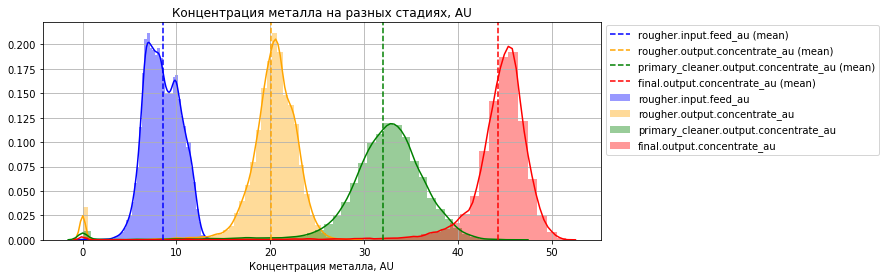

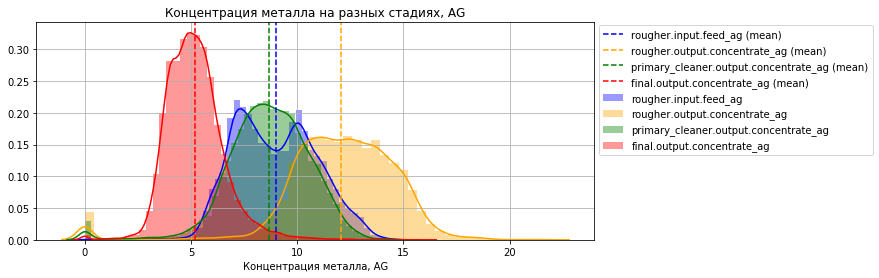

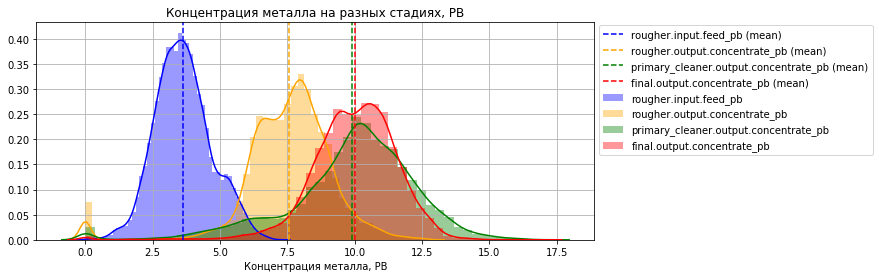

In [38]:
# визуализация концентрации металлов
for metal in ['au', 'ag', 'pb']:
    hist_by_stage_substance(gold_full, metal)

Итак, на графиках прослеживается следующая тенденция:
- **Золото (AU)**. С каждым новым этапом очистки концентрация постепенно **повышается**, что кажется вполне разумным, т. к. процесс направлен на увеличение содержания именно этого вещества. 
- **Серебро (AG)**. После флотации выборочная средняя концентрация **повышается**, но затем постепенно начинает **снижаться**. На финале выборочная средняя концентрация наиболее **низкая**.
- **Свинец (PB)**. Концентрация вещества сначала повышается (после флотации, после первой очистки). Но на финале она остается приблизительно **на том же** уровне.

Также примечательно, что **для всех металлов** все распределения имеют **околонулевые выбросы** которые выражаются в наличии **небольшого пика** в районе околонулевых значений. Это выглядит странно, поскольку **нулевое** значение говорит об **отсутствии** металла в концентрате.  
***Вопрос об аномальных значениях будет рассмотрен подробнее на соответствующем Шаге 2.3***.

Таким образом, в ходе процесса в сырье/продукте постепенно повышается не только **содержание золота**, но и **содержание свинца**. Что касается **серебра**, то его концентрация сначала повышается, но на финале **снижается** (в нашем случае выборочное среднее финала ниже, чем среднее до флотации).

Также мы можем посмотреть на концентрацию вещества в **отвальных хвостах**.

In [39]:
def hist_by_stage_tail(df_name, metal_name, n_bins=50):
    """Функция для построения совместной гистограммы по концентрации металлов в ХВОСТАХ:
    - df_name - название датафрейма;
    - metal_name - рассматриваемый металл;
    - n_bins - количество корзин (по умолчанию 50)."""
    
    # настройка размера
    plt.figure(figsize=(10,4))
    
    # словарь с колонками и цветом
    col_names_dict = {'rougher.output.tail_' + metal_name : 'blue',
                      'primary_cleaner.output.tail_' + metal_name: 'orange',
                      'secondary_cleaner.output.tail_' + metal_name: 'green',
                      'final.output.tail_' + metal_name: 'red'}
    
    # построение гистограммы
    for key, value in col_names_dict.items():
        sns.distplot(df_name[key], label=key, color=value, kde=True, bins=n_bins)
    
    # построение mean
    for key, value in col_names_dict.items():
        plt.axvline(x=df_name[key].mean(), label=key+' (mean)', color=value, linestyle='--')
        
       
    plt.title('Концентрация металла в хвостах на разных стадиях, ' + metal_name.upper())
    plt.xlabel('Концентрация металла, ' + metal_name.upper())
    
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1.01))
    plt.grid()
    plt.show()

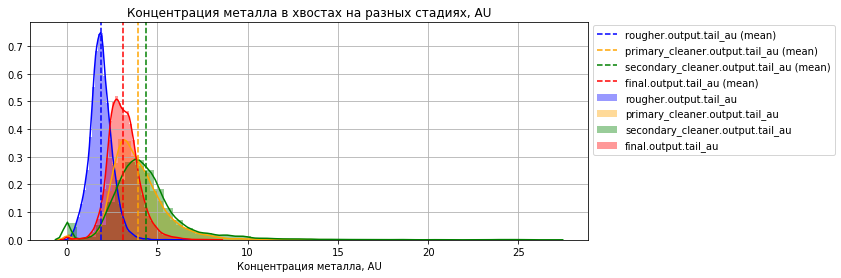

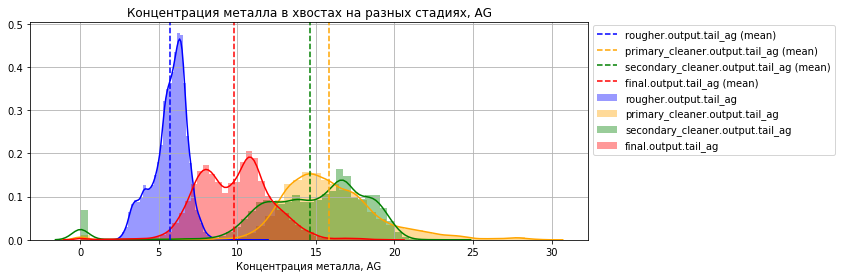

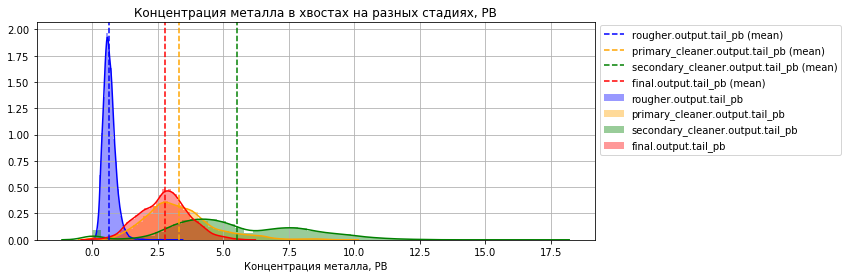

In [40]:
# визуализация концентрации металлов
for metal in ['au', 'ag', 'pb']:
    hist_by_stage_tail(gold_full, metal)

На графиках по количеству вещества в **хвостах** наблюдается следующее:
- **Золото (AU), хвосты**. С каждый новым этапом концентрация вещества **увеличивается** (после флотации, после первой очистки, после второй очистки). Особенно примечательно, что после **первой** и особенно **второй очистки** значения концентрации золота могут быть **очень высокими** - это выражается в длинном правом хвосте гистограммы. Но уже на **финальном** этапе содержание металла в хвостах становится меньше.
- **Серебро (AG), хвосты**. На этапах очистки содержание вещества **повышается** - это выржается в т. ч. в длинном правом хвосте после **первого** очистительного этапа. Но затем на **финале** оно снова становится меньше.
- **Свинец (PB), хвосты**. После **второй очистки** разброс значений по содержанию металла в хвостах **очень широкий** по сравнению с другими этапами. Однако на **финале** он становится меньше.

Таким образом, **на этапе очистки** наблюдается **увеличение** содержания металлов в хвостах, по сравнению с этапом **флотации**. Однако на **финальном** этапе это значение **снижается**.

### 2.1. Вывод

- **Изучение содержания металлов в сырье/продукте**
 - Заметнее всего в сырье/продукте повышается **коцентрация золота**, что вполне естественно, т. к. процесс направлен именно на это.
 - На каждом новом этапе (кроме финала), помимо концентрации золота, повышается и **содержание свинца**.
 - Что касается **серебра**, то его концентрация сначала повышается, но на финале **снижается**.


- **Изучение содержания металлов в хвостах** 
 - Для всех металлов существует похожая тенденция: **на этапе очистки** наблюдается **увеличение** содержания металлов в хвостах, по сравнению с этапом **флотации**. Онако на **финальном** этапе это значение **снижается**.
 - Для этапов **очистки** характерен самый **широкий диапазон** по сравнению с другими этапами. Это говорит о том, что на этапе встречаются хвосты с очень разнообразной концентрацией.


- При изучении концентрации наблюдается **околонулевой пик**. Это выглядит странно, поскольку **нулевое** значение говорит об **отсутствии** металла в концентрате. ***Вопрос об аномальных значениях будет рассмотрен подробнее на соответствующем Шаге 2.3***.

### 2.2. Сравнение распределения размеров гранул сырья

Необходимо сравнить **распределение размеров гранул сырья** на обучающей и тестовой выборках и проверить, сильно ли они отличаются друг от друга. Сначала посмотрим, какие колонки связаны с **размером гранул**:

In [41]:
# вывод всех названий с 'size'
print(check_word_in_col(gold_full, 'size'))

Проверка слова "size"
['primary_cleaner.input.feed_size' 'rougher.input.feed_size']


**Размер гранул** указан для **руды** `rougher.input.feed_size` и для **чернового концентрата** `primary_cleaner.input.feed_size`. 

Сначала рассмотрим распределения переменной для поступающей на флотацию **руды** - `rougher.input.feed_size`.

In [42]:
train_size_rougher = gold_train['rougher.input.feed_size']
test_size_rougher = gold_test['rougher.input.feed_size']

# вывод сводной статистики по обучающей и тестовой выборке
check_size_rougher = pd.concat([train_size_rougher.describe(), test_size_rougher.describe()], axis=1)
check_size_rougher.columns = ['train_rougher', 'test_rougher']
check_size_rougher

,train_rougher,test_rougher
count,11017.000000,5383.000000
mean,57.215128,56.338644
std,18.913146,21.836788
min,9.659576,0.046369
25%,48.397242,43.913766
50%,53.843359,50.924232
75%,61.461770,62.364984
max,484.967466,477.445473


In [43]:
def hist_by_size(df_train, df_test, label_train, label_test, title, xticks=None, xlim=None, bins=50):
    """Функция возвращает распределение данных размера для двух выборок:
    - df_train - наименование датафрейма (обучающая выборка);
    - df_test - наименование датафрейма (тестовая выборка);
    - label_train - лейбл для обучающей выборки;
    - label_test - лейбл для тестовой выборки;
    - title - название для заголовка;
    - xticks - значение xticks;
    - xlim - значение xlim;
    - bins (по умолчанию 50) - значение bins."""
    
    plt.figure(figsize=(11,5))
    sns.distplot(df_train, label=label_train, kde=True, bins=bins)
    sns.distplot(df_test, label=label_test, kde=True, bins=bins)
    
    plt.axvline(x=df_train.mean(), label=f'{label_train} (mean)', color='blue', linestyle='--')
    plt.axvline(x=df_test.mean(), label=f'{label_test} (mean)', color='orange', linestyle='--')
    
    plt.title(f'Сравнение размера гранул сырья (обучающая и тестовая выборки), \n {title}')
    plt.xlabel('Размер гранул сырья')
    plt.xticks(xticks, rotation=45)
    
    plt.xlim(xlim)
    
    plt.legend()
    plt.grid()
    plt.show()

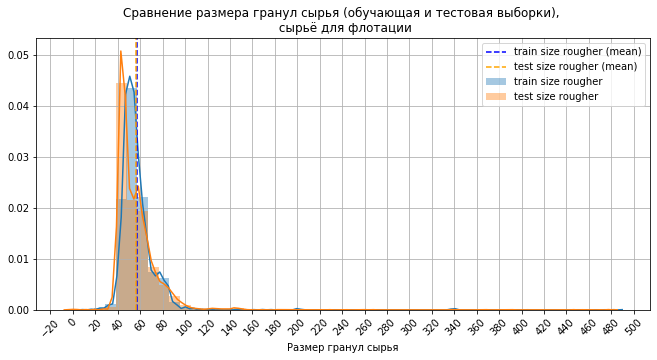

In [44]:
# размер этапа rougher
hist_by_size(train_size_rougher, test_size_rougher, 'train size rougher', 'test size rougher',
             'сырьё для флотации', [i*20 for i in range(-1, 26)])

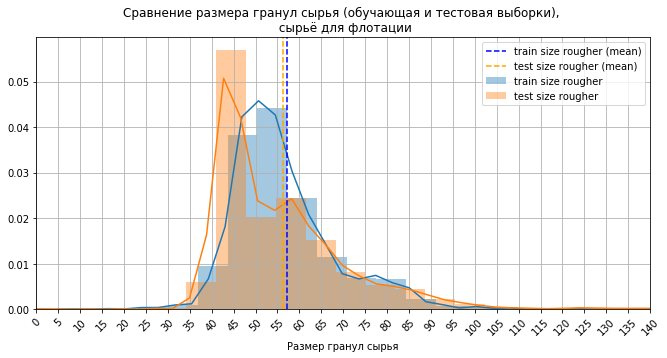

In [45]:
# построение графиков - ограничение диапазона
hist_by_size(train_size_rougher, test_size_rougher, 'train size rougher', 'test size rougher',
             'сырьё для флотации', [i*5 for i in range(0, 30)], (0, 140), bins=70)

- Размеры гранул располагаются приблизительно в **одном диапазоне**, но **тестовая** выборка несколько смещена в **меньшую** сторону:
 - Размах **обучающей** выборки: от 9.65 до 484.96
 - Размах **тестовой** выборки: от 0.04 до 477.44
 
 
- Несмотря на наличие экстремальных значений, для обеих выборок **среднее** и **медиана** располагаются приблизительно на одном уровне: 
 - **Обучающая**: среднее - 57.21, медиана - 53.84; 
 - **тестовая**: среднее - 56.33, медиана - 50.92.


- Несмотря на схожесть сводной статистики, распределение выборок **не кажется похожим**. Например, распределение **тестовой** выборки **менее равномерно** (пик около значения 45). На **обучающей** выборке такой особенности нет.

Посмотрим, как будет выглядеть **распределение** для тестовой и обучающей выборок, если мы **заново** сделаем сплит по имеющимся данным.  
Для этого **исходную** выборку разделим на **обучающую** и **тестовую**, соблюдая приблизительно те же пропорции, что при сравниваемых выборках.

Сделаем разделение без **признаков** и **целевых признаков** (пока нас интересует именно сам факт разделения на несколько выборок) и заново построим гистограммы:

In [46]:
SEED = 111

# разделение выборок на обучающую и тестовую
df_train, df_test = train_test_split(gold_full, test_size=0.30, random_state=SEED)

# выделение колонки с размером гранул сырья
train_size_rougher_new = df_train['rougher.input.feed_size']
test_size_rougher_new = df_test['rougher.input.feed_size']

# вывод сводной статистики по обучающей и тестовой выборке
check_size_rougher_new = pd.concat([train_size_rougher_new.describe(), test_size_rougher_new.describe()], axis=1)
check_size_rougher_new.columns = ['train_rougher_new', 'test_rougher_new']
check_size_rougher_new

,train_rougher_new,test_rougher_new
count,11265.000000,4829.000000
mean,56.417018,56.774038
std,17.020092,19.307564
min,0.046369,0.054843
25%,46.711138,46.864790
50%,53.260791,53.246851
75%,61.458188,61.873926
max,404.851543,484.967466


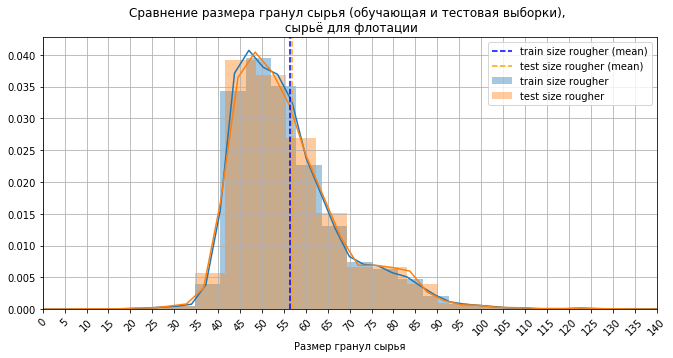

In [47]:
# построение графиков - ограничение диапазона
hist_by_size(train_size_rougher_new, test_size_rougher_new, 'train size rougher', 'test size rougher',
             'сырьё для флотации', [i*5 for i in range(0, 30)], (0, 140), bins=70)

Значения по **сводной статистике** остались практически такими же, однако заметно изменилось **распределение**.  
При повторном разделении **распределение выборок** стало **более похожим**.

Поскольку **различающиеся распределения** могут привести к **неправильной оценке модели**, примем решение сделать **сплит заново**, чтобы выборки были **более равномернми**.

Теперь рассмотрим значения для **чернового концентрата** - `primary_cleaner.input.feed_size`. 

In [48]:
train_size_primary_cleaner = gold_train['primary_cleaner.input.feed_size']
test_size_primary_cleaner = gold_test['primary_cleaner.input.feed_size']

# вывод сводной статистики по обучающей и тестовой выборке
check_size_primary_cleaner = pd.concat([train_size_primary_cleaner.describe(), 
                                        test_size_primary_cleaner.describe()], axis=1)
check_size_primary_cleaner.columns = ['train_primary_cleaner', 'test_primary_cleaner']
check_size_primary_cleaner

,train_primary_cleaner,test_primary_cleaner
count,11017.000000,5383.000000
mean,7.396036,7.268670
std,0.575317,0.610441
min,1.080000,5.650000
25%,7.030000,6.892500
50%,7.323334,7.250000
75%,7.740000,7.600000
max,10.470000,15.500000


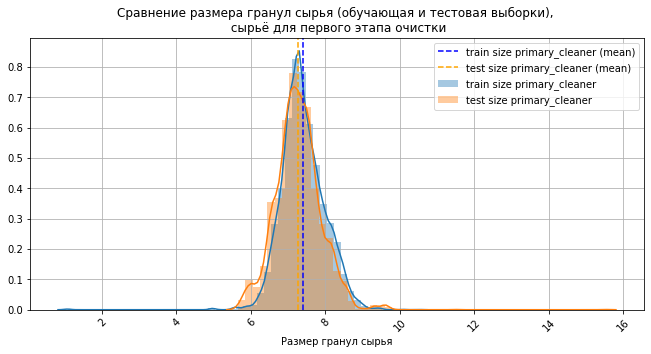

In [49]:
# построение графиков
hist_by_size(train_size_primary_cleaner, test_size_primary_cleaner, 'train size primary_cleaner', 'test size primary_cleaner',
             'сырьё для первого этапа очистки')

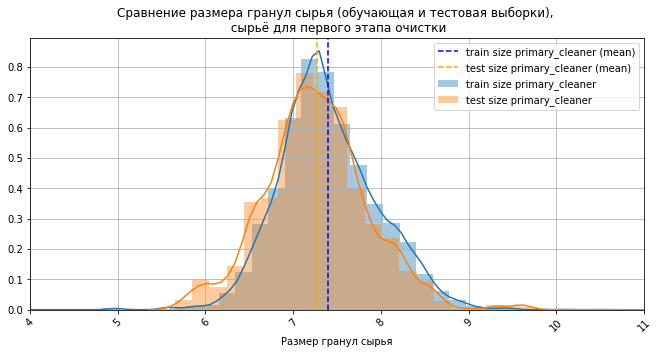

In [50]:
# построение графиков - ограничение диапазона
hist_by_size(train_size_primary_cleaner, test_size_primary_cleaner, 'train size primary_cleaner', 'test size primary_cleaner',
             'сырьё для первого этапа очистки', xlim=(4, 11))

В отличие от предыдущего случая, распределения достаточно **похожи**. Они симметричны, имеют один пик в районе **среднего**.  

Поскольку из-за непохожести распределения в первом случае, мы будем делать **повторный респлит выборок**, проверим, как поведет себя **размер гранул** для **первого этапа очистки**.

In [51]:
# выделение колонки с размером гранул сырья
train_size_primary_cleaner_new = df_train['primary_cleaner.input.feed_size']
test_size_primary_cleaner_new = df_test['primary_cleaner.input.feed_size']

# вывод сводной статистики по обучающей и тестовой выборке
check_size_primary_cleaner_new = pd.concat([train_size_primary_cleaner_new.describe(), 
                                            test_size_primary_cleaner_new.describe()], axis=1)
check_size_primary_cleaner_new.columns = ['train_primary_cleaner_new', 'test_primary_cleaner_new']
check_size_primary_cleaner_new

,train_primary_cleaner_new,test_primary_cleaner_new
count,11265.000000,4829.000000
mean,7.356805,7.376877
std,0.580416,0.588764
min,1.080000,4.970000
25%,7.000000,7.000000
50%,7.300000,7.310000
75%,7.700000,7.710000
max,11.470008,15.500000


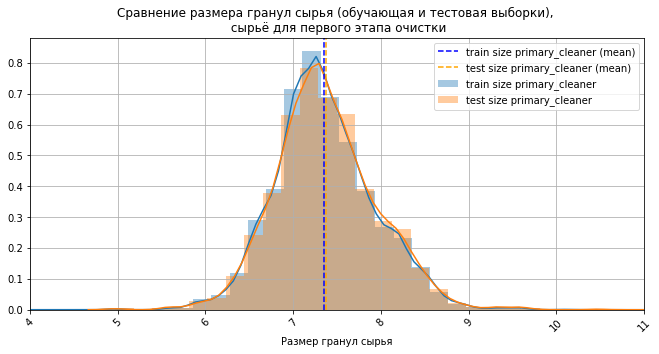

In [52]:
# построение графиков - ограничение диапазона
hist_by_size(train_size_primary_cleaner_new, test_size_primary_cleaner_new,
             'train size primary_cleaner', 'test size primary_cleaner',
             'сырьё для первого этапа очистки', xlim=(4, 11))

Да, распределения ведут себя одинаковым образом, сводные статистики тоже достаточно похожи.

Таким образом, мы проверили **размер гранул сырья** для **флотации** и для **первичной очистки**.  
В обоих случаях для **обучающей** и **тестовой** выборок показатели **сводной статистики** достаточно похожи. 

Тем не менее, для исходного сырья флотации **распределения** выборок ведут себя несколько **по-разному**. Разное распределение может привести к **некорректной работе модели**. Чтобы избежать данной проблемы мы приняли решение **повторно** поделить выборки на **обучающую** и **тестовую**.

### 2.2. Вывод

- Оценён размер гранул сырья для **руды** `rougher.input.feed_size` и для **чернового концентрата** `primary_cleaner.input.feed_size`.
- Распределение размера **руды для флотации** `rougher.input.feed_size` **различалось**: распределение **тестовой** выборки имело бо́льшую смещённость в меньшую сторону. При этом **сводные статистики** распределений были достаточно похожи.
- Во избежание проблем на этапе обучения, было принято решение **повторно разделить** выборки. Повторное разделение дало **более похожее распределение** данных.
- Подобной проблемы для `primary_cleaner.input.feed_size` не наблюдалось. Распределения изначально были достаточно **похожи**.

### 2.3. Исследование суммарной концентрации веществ в концентратах

Необходимо исследовать **суммарную концентрацию** всех веществ **на разных стадиях**: в сырье, в черновом и финальном концентратах.  
Посмотрим, какие колонки относятся к **концентрации** веществ:

In [53]:
# вывод всех названий с 'concentrate'
print(check_word_in_col(gold_full, 'concentrate'))

Проверка слова "concentrate"
['final.output.concentrate_ag' 'final.output.concentrate_pb'
 'final.output.concentrate_sol' 'final.output.concentrate_au'
 'primary_cleaner.output.concentrate_ag'
 'primary_cleaner.output.concentrate_pb'
 'primary_cleaner.output.concentrate_sol'
 'primary_cleaner.output.concentrate_au'
 'rougher.calculation.sulfate_to_au_concentrate'
 'rougher.output.concentrate_ag' 'rougher.output.concentrate_pb'
 'rougher.output.concentrate_sol' 'rougher.output.concentrate_au']


Выведем **суммарные значения** и построим для них **распределение**:

In [54]:
# создание Series с суммами
rougher_output_concentrate_sum = \
                gold_full['rougher.output.concentrate_au'] + gold_full['rougher.output.concentrate_ag'] + \
                gold_full['rougher.output.concentrate_pb'] + gold_full['rougher.output.concentrate_sol']

primary_cleaner_output_concentrate_sum = \
                gold_full['primary_cleaner.output.concentrate_au'] + gold_full['primary_cleaner.output.concentrate_ag'] + \
                gold_full['primary_cleaner.output.concentrate_pb'] + gold_full['primary_cleaner.output.concentrate_sol']

final_output_concentrate_sum = \
                gold_full['final.output.concentrate_au'] + gold_full['final.output.concentrate_ag'] + \
                gold_full['final.output.concentrate_pb'] + gold_full['final.output.concentrate_sol']

In [55]:
def hist_concentrate_sum(sum_series_name, sum_label, sum_title, hist_color, n_bins=50):
    """Функция строит гистограмму для суммарной концентрации:
    - sum_series_name - Series с суммарными значениями;
    - sum_label - наименование лейбла;
    - sum_title - наименование этапа замерения концентрации;
    - hist_color - цвет гистограммы;
    - n_bins - количество корзин (по умолчанию 50)."""
    
    plt.figure(figsize=(10,4))
    
    sns.distplot(sum_series_name, label=sum_label, color=hist_color, kde=True, bins=n_bins)
    plt.axvline(x=sum_series_name.mean(), label=sum_label+' (mean)', color=hist_color, linestyle='--')
    
    plt.title('Суммарная концентрация веществ, \n' + sum_title)
    plt.xlabel('Суммарная концентрация веществ')
    
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()

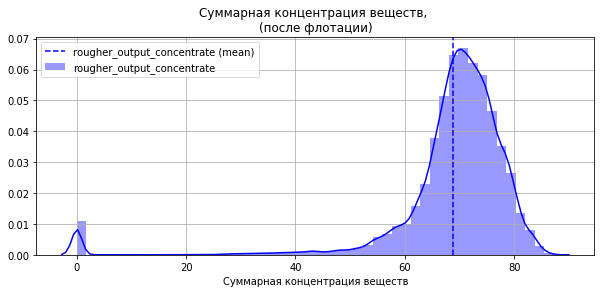

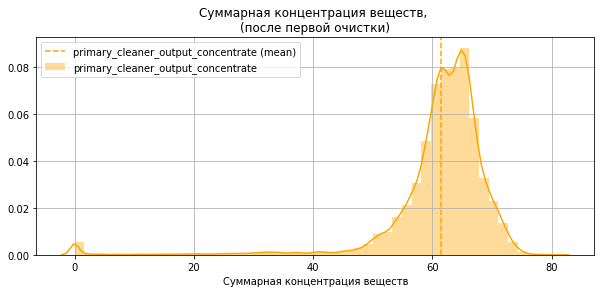

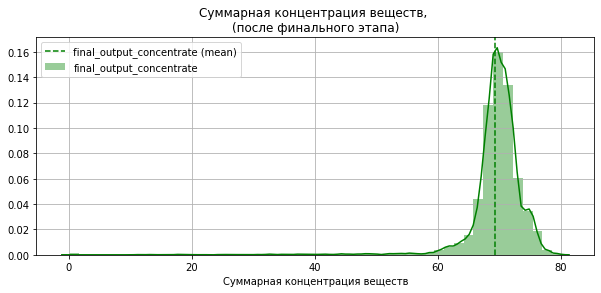

In [56]:
# построение гистограмм
hist_concentrate_sum(rougher_output_concentrate_sum,
                     'rougher_output_concentrate', '(после флотации)', 'blue')
hist_concentrate_sum(primary_cleaner_output_concentrate_sum,
                     'primary_cleaner_output_concentrate', '(после первой очистки)', 'orange')
hist_concentrate_sum(final_output_concentrate_sum,
                     'final_output_concentrate', '(после финального этапа)', 'green')

Для всех трёх случаев наблюдаются **околонулевые значения**, а также тянущиеся **влево хвосты** - это означает, что среди данных встречаются значения, которые достаточно сильно отклоняются в **меньшую сторону**.

Как было сказано ранее, кажется странным, что суммарно в смеси **нет вообще каких-бы то ни было веществ**. Поэтому примем решение **удалить строки**, где на каком-либо из этапов **концентрация веществ равна 0**.

In [57]:
# добавление суммарных колонок
gold_full['rougher_output_concentrate_sum'] = rougher_output_concentrate_sum
gold_full['primary_cleaner_output_concentrate_sum'] = primary_cleaner_output_concentrate_sum
gold_full['final_output_concentrate_sum'] = final_output_concentrate_sum

# проверка значений
gold_full.head(3)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher_output_concentrate_sum,primary_cleaner_output_concentrate_sum,final_output_concentrate_sum
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,66.424950,72.640924,63.644396
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,67.012710,72.543485,63.957723
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,66.103793,72.095042,64.311180


Посмотрим, сколько всего в нашей исходной выборке строк, где хотя бы на одном этапе **сумма всех веществ равна 0**:

In [58]:
# вывод среза, где хотя бы одна сумма этапа равна 0
print('Количество строк с нулевой суммой:', end=' ')
print(len(gold_full.query('rougher_output_concentrate_sum == 0 or \
                           primary_cleaner_output_concentrate_sum == 0 or \
                           final_output_concentrate_sum == 0')))

Количество строк с нулевой суммой: 415


Итак, **415 строк** (что составляет около 2.5%) нашего исходного датафрейма содержат **аномальные значения**. Аномальность значений заключается в том, что на каком-либо из этапов (флотация, очистка, финал) встречается смесь **без каких-либо веществ**. Это может говорить либо об отсутствии, либо о некорректности замеров.

Оставим строки без нулевых суммарных значений:

In [59]:
gold_full_sum = gold_full.query('rougher_output_concentrate_sum > 0 and \
                                primary_cleaner_output_concentrate_sum > 0 and \
                                final_output_concentrate_sum > 0')

print('Количество строк ДО:', len(gold_full))
print('Количество строк ПОСЛЕ:', len(gold_full_sum))
gold_full_sum.head(3)

Количество строк ДО: 16094
Количество строк ПОСЛЕ: 15679


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher_output_concentrate_sum,primary_cleaner_output_concentrate_sum,final_output_concentrate_sum
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,66.424950,72.640924,63.644396
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,67.012710,72.543485,63.957723
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,66.103793,72.095042,64.311180


Ушли все строки с аномальными значениями, в нашем распоряжении осталось **15679 наблюдений**.

## 2.3. Вывод

- На наличие аномалий в суммарных значениях веществ были проверены концентраты для этапов после **флотации**, **первой очистки**, **финального этапа**.
- На всех этапах наблюдался аномальный **околонулевой пик** - т. е. суммарно в смеси **не было каких-бы то ни было веществ**.
- Было принято решение **удалить** данные с **нулевым содержанием веществ**.
- В итоге из исходных данных **удалено 415 строк (2,5%)**. До финального обучающего этапа дошло **15679 наблюдений**.

## Шаг 2. Вывод

#### [2.1. Изучение концентрации металлов на различных этапах очистки](#2.1.-Изучение-концентрации-металлов-на-различных-этапах-очистки)

- **Изучение содержания металлов в сырье/продукте**
 - Заметнее всего в сырье/продукте повышается **коцентрация золота**, что вполне естественно, т. к. процесс направлен именно на это.
 - На каждом новом этапе (кроме финала), помимо концентрации золота, повышается и **содержание свинца**.
 - Что касается **серебра**, то его концентрация сначала повышается, но на финале **снижается**.


- **Изучение содержания металлов в хвостах** 
 - Для всех металлов существует похожая тенденция: **на этапе очистки** наблюдается **увеличение** содержания металлов в хвостах, по сравнению с этапом **флотации**. Онако на **финальном** этапе это значение **снижается**.
 - Для этапов **очистки** характерен самый **широкий диапазон** по сравнению с другими этапами. Это говорит о том, что на этапе встречаются хвосты с очень разнообразной концентрацией.


- При изучении концентрации наблюдается **околонулевой пик**. Это выглядит странно, поскольку **нулевое** значение говорит об **отсутствии** металла в концентрате. ***Вопрос об аномальных значениях будет рассмотрен подробнее на соответствующем Шаге 2.3***.

    
    
#### [2.2. Сравнение распределения размеров гранул сырья](#2.2.-Сравнение-распределения-размеров-гранул-сырья)  
 - Оценён размер гранул сырья для **руды** `rougher.input.feed_size` и для **чернового концентрата** `primary_cleaner.input.feed_size`.
 - Распределение размера **руды для флотации** `rougher.input.feed_size` **различалось**: распределение **тестовой** выборки имело бо́льшую смещённость в меньшую сторону. При этом **сводные статистики** распределений были достаточно похожи.
 - Во избежание проблем на этапе обучения, было принято решение **повторно разделить** выборки. Повторное разделение дало **более похожее распределение** данных.
 - Подобной проблемы для `primary_cleaner.input.feed_size` не наблюдалось. Распределения изначально были достаточно **похожи**.
    
    
#### [2.3. Исследование суммарной концентрации веществ в концентратах](#2.3.-Исследование-суммарной-концентрации-веществ-в-концентратах)  
 - На наличие аномалий в суммарных значениях веществ были проверены концентраты для этапов после **флотации**, **первой очистки**, **финального этапа**.
 - На всех этапах наблюдался аномальный **околонулевой пик** - т. е. суммарно в смеси **не было каких-бы то ни было веществ**.
 - Было принято решение **удалить** данные с **нулевым содержанием веществ**.
 - В итоге из исходных данных **удалено 415 строк (2,5%)**. До финального обучающего этапа дошло **15679 наблюдений**.

## Шаг 3. Обучение и проверка моделей

Данный шаг разделим на несколько задач:

- [3.1. Написание функции для вычисления итоговой метрики SMAPE](#3.1.-Написание-функции-для-вычисления-итоговой-метрики-SMAPE)
- [3.2. Обучение и тестирование](#3.2.-Обучение-и-тестирование)

### 3.1. Написание функции для вычисления итоговой метрики SMAPE

Сначала напишем функцию, которая в принципе вычисляет **метрику SMAPE (Symmetric mean absolute percentage error)**:

In [60]:
def smape(target, predictions):   
    """Функция рассчитывает значение метрики качества SMAPE:
    - target - массив с реальными значениями;
    - predictions - массив с предсказанными значениями."""
    
    result_sum = 0
    N = len(target)
    for i in range(N):
        diff = abs(target[i] - predictions[i])
        abs_sum_div2 = (abs(target[i]) + abs(predictions[i])) / 2
        result_sum += (diff / abs_sum_div2)
    result = result_sum / N
        
    return result * 100

In [61]:
# проверка работы функции
target = pd.Series([3, 5, 3, 10])
predictions = pd.Series([3, 7, 4, 14])

print(smape(target, predictions))
print((0 + 2/6 + 1/3.5 + 4/12)/len(target)*100)

23.809523809523807
23.809523809523807


Теперь можем написать функцию для вычисления **итоговой sMAPE**:

In [62]:
def sum_smape(smape_rougher, smape_final):    
    """Функция вычисляет итоговый SMAPE:
    - smape_rougher - значение SMAPE (rougher);
    - smape_final - значение SMAPE (final)."""    
    result = 0.25 * smape_rougher + 0.75 * smape_final
    return result

### 3.1. Вывод

- Написаны функции для расчёта требуемых метрик: **SMAPE** и **итогового SMAPE**.

### 3.2. Обучение и тестирование

Рассмотрев **размеры гранул**, мы пришли к выводу, что будем проводить **повторное деление выборок**.  
Сначала выделим **признаки** и **целевые признаки** из предобработанной исходной выборки.
- **Целевыми признаками** будут выступать `'rougher.output.recovery'` и `'final.output.recovery'`

- Что касается обучающих **признаков** - данные по **output** и **calculation** замеряются далеко не сразу. Поэтому мы **не будем использовать их** для обучения модели и не будем включать признаки.

Поскольку нам придётся выделять сразу **два целевых признака**, проще сделать это, выбрав **два отдельных датасета**. Из них уже мы сможем выделять нужные нам **целевые признаки**. В качестве **доли тестовой выборки** выберем 30%.

In [63]:
# разделение выборок на обучающую и тестовую
df_train, df_test = train_test_split(gold_full_sum, test_size=0.30, random_state=SEED)

# обучающая выборка
features_train = df_train[gold_test.columns].reset_index(drop=True)
# тестовая выборка
features_test = df_test[gold_test.columns].reset_index(drop=True)
# проверка значений
features_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,178.030731,4.869834,7.470000,1.193619,1598.921551,-500.618856,1599.452467,-500.956324,1602.055380,-501.296507,...,12.012161,-499.843081,11.923635,-499.462946,9.920328,-499.817962,7.102368,-500.088793,18.008842,-500.994811
1,195.012807,9.490278,6.600000,1.547603,1547.090946,-499.836638,1548.125385,-501.075808,1549.623671,-500.043398,...,20.029061,-502.030509,15.056593,-117.511008,10.939702,-500.819556,9.026507,-500.033354,14.999783,-499.994439
2,167.050918,10.522449,7.730000,1.190977,1500.257557,-499.187422,1497.746479,-495.984084,1496.640825,-508.779227,...,16.990899,-500.495537,15.008291,-499.417573,13.299743,-501.257825,12.006909,-500.937527,20.999666,-503.775353
3,152.156968,6.983547,7.143333,0.487605,1783.828472,-500.264797,1751.984621,-499.974694,1750.470489,-499.417982,...,25.014491,-399.450872,23.033023,-400.466591,26.005834,-449.751431,23.989729,-449.977382,29.987693,-500.135615
4,157.010728,8.007548,7.030000,0.995561,1625.415509,-500.735192,1702.182529,-499.691790,1698.285537,-499.261994,...,20.026076,-498.937349,17.033196,-500.873928,18.812898,-500.881753,14.003848,-499.349079,24.986680,-498.351476


Поскольку в данных встречаются признаки с разными шкалами, то имеет смысл сделать **масштабирование признаков**.  

In [64]:
numeric = features_train.columns

# создание образца модели и обучение
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

features_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,0.612956,-1.297784,0.184304,0.257719,0.093116,-0.305944,0.068090,-0.283373,0.136844,-0.302537,...,-1.243472,-0.296322,-0.568452,-0.589251,-1.009601,-0.336239,-0.911304,-0.349524,-0.254911,0.127630
1,1.026762,0.118151,-1.293186,0.927695,-0.312993,-0.280738,-0.326896,-0.287019,-0.258257,-0.263104,...,0.309699,-0.341114,0.073045,5.029961,-0.819898,-0.363996,-0.546350,-0.348131,-0.813667,0.152536
2,0.345409,0.434460,0.625853,0.252718,-0.679947,-0.259817,-0.714585,-0.131638,-0.657511,-0.538004,...,-0.278906,-0.309682,0.063155,-0.588583,-0.380700,-0.376142,0.018946,-0.370842,0.300459,0.058402
3,-0.017516,-0.650036,-0.370462,-1.078536,1.541920,-0.294535,1.241898,-0.253417,1.255232,-0.243424,...,1.275561,1.759425,1.706279,0.867167,1.983872,1.051271,2.291740,0.909143,1.969457,0.149021
4,0.100757,-0.336231,-0.562932,-0.117141,0.300705,-0.309693,0.858647,-0.244784,0.861990,-0.238515,...,0.309120,-0.277775,0.477769,-0.610009,0.645284,-0.365720,0.397707,-0.330944,1.040813,0.193441


Выделение **целевых признаков (target)** для обучающей и тестовой выборки:
- Целевой признак `rougher.output.recovery`

In [65]:
# обучающая выборка
target_train_rougher = df_train['rougher.output.recovery'].reset_index(drop=True)
# тестовая выборка
target_test_rougher = df_test['rougher.output.recovery'].reset_index(drop=True)
# проверка значений
target_test_rougher.head()

0    87.236306
1    87.007477
2    91.959164
3    81.558264
4    87.683850
Name: rougher.output.recovery, dtype: float64

- Целевой признак `final.output.recovery`

In [66]:
# обучающая выборка
target_train_final = df_train['final.output.recovery'].reset_index(drop=True)
# тестовая выборка
target_test_final = df_test['final.output.recovery'].reset_index(drop=True)
# проверка значений
target_test_final.head()

0    64.829246
1    75.078648
2    73.757668
3    64.524809
4    70.916660
Name: final.output.recovery, dtype: float64

Создадим кастомизированный *scoring* **SMAPE**, который отсутствует в стандартной библиотеке sklearn:

In [67]:
# создание кастомизированного scoring
neg_smape = make_scorer(smape, greater_is_better=False)

### Константная модель

Для начала проверим результаты на константной модели. Если итоговый SMAPE будет выше этого значения, значит модель справилась с задачей **хуже**, чем расчёты с константой. В качестве константы используем **медиану**.

In [68]:
# расчёт итогового SMAPE для константной модели
constant_median_rougher = pd.Series(target_test_rougher.median(), index=range(len(target_test_rougher)))
constant_smape_rougher = smape(target_test_rougher.values, constant_median_rougher.values)
constant_median_final = pd.Series(target_test_final.median(), index=range(len(target_test_final)))
constant_smape_final = smape(target_test_final.values, constant_median_final.values)

print('Итоговое значение SMAPE:', sum_smape(constant_smape_rougher, constant_smape_final))

Итоговое значение SMAPE: 7.827129613320965


Для каждой модели будем подбирать **комбинацию гиперпараметров** с помощью *GridSearchCV* либо *RandomizedSearchCV*.    
Значения SMAPE рассчитываются для двух целевых признаков (стадии *rougher* и *final*). В каждом случае выводится наилучщая комбинация гиперпараметров. Для финальной модели мы будем проверять все полученные комбинации и рассчитывать **итоговый SMAPE**.

Рассмотрим следующие модели:
- Линейная регрессия
- Решающее дерево
- Случайные лес

### Линейная регрессия

In [69]:
# подбор гиперпараметров
lr_cv = GridSearchCV(estimator=LinearRegression(),
                     param_grid={'fit_intercept':[True, False]},
                     cv=5, scoring=neg_smape)

lr_cv.fit(features_train.values, target_train_rougher.values)
lr_params_rougher = lr_cv.best_params_
lr_score_rougher = np.abs(lr_cv.best_score_)

print("Лучшая комбинация rough: {}".format(lr_params_rougher))
print("Лучшее значение SMAPE rough: {}".format(lr_score_rougher))
print()

lr_cv.fit(features_train.values, target_train_final.values)
lr_params_final = lr_cv.best_params_
lr_score_final = np.abs(lr_cv.best_score_)

print("Лучшая комбинация final: {}".format(lr_params_final))
print("Лучшее значение SMAPE final: {}".format(lr_score_final))

Лучшая комбинация rough: {'fit_intercept': True}
Лучшее значение SMAPE rough: 3.9864860070893817

Лучшая комбинация final: {'fit_intercept': True}
Лучшее значение SMAPE final: 6.936799015651248


In [70]:
# проверка на тестовой выборке
lr_rougher = LinearRegression()
lr_rougher.fit(features_train, target_train_rougher)
lr_predictions_rougher = lr_rougher.predict(features_test)
lr_smape_rougher = smape(target_test_rougher, lr_predictions_rougher)

lr_final = LinearRegression()
lr_final.fit(features_train, target_train_final)
lr_predictions_final = lr_final.predict(features_test)
lr_smape_final = smape(target_test_final, lr_predictions_final)

print('Итоговое значение SMAPE:', sum_smape(lr_smape_rougher, lr_smape_final))

Итоговое значение SMAPE: 6.095592275159781


- Значение получилось **ниже**, чем для константной модели.
- Проверим, возможно ли **улучшить результат**. Для этого рассмотрим ещё несколько моделей.

### Решающее дерево

In [71]:
# подбор гиперпараметров
dt_cv = RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=SEED),
                           param_distributions={'max_depth': np.arange(5, 10), 'min_samples_leaf': [0.001, 0.005]},
                           cv=5, scoring=neg_smape, random_state=SEED)

dt_cv.fit(features_train.values, target_train_rougher.values)
dt_params_rougher = dt_cv.best_params_
dt_score_rougher = np.abs(dt_cv.best_score_)

print("Лучшая комбинация rough: {}".format(dt_params_rougher))
print("Лучшее значение SMAPE rough: {}".format(dt_score_rougher))
print()

dt_cv.fit(features_train.values, target_train_final.values)
dt_params_final = dt_cv.best_params_
dt_score_final = np.abs(dt_cv.best_score_)

print("Лучшая комбинация final: {}".format(dt_params_final))
print("Лучшее значение SMAPE final: {}".format(dt_score_final))

Лучшая комбинация rough: {'min_samples_leaf': 0.001, 'max_depth': 9}
Лучшее значение SMAPE rough: 3.242723799986037

Лучшая комбинация final: {'min_samples_leaf': 0.001, 'max_depth': 9}
Лучшее значение SMAPE final: 6.5688417407314645


- Лучшей признана комбинация *min_samples_leaf: 0.001, max_depth: 9*.

In [72]:
# проверка на тестовой выборке
dt_rougher = DecisionTreeRegressor(random_state=SEED, min_samples_leaf=0.001, max_depth=9)
dt_rougher.fit(features_train, target_train_rougher)
dt_predictions_rougher = dt_rougher.predict(features_test)
dt_smape_rougher = smape(target_test_rougher, dt_predictions_rougher)

dt_final = DecisionTreeRegressor(random_state=SEED, min_samples_leaf=0.001, max_depth=9)
dt_final.fit(features_train, target_train_final)
dt_predictions_final = dt_final.predict(features_test)
dt_smape_final = smape(target_test_final, dt_predictions_final)

print(f'Итоговое значение SMAPE (max_depth=9, min_samples_leaf=0.001):',
      sum_smape(dt_smape_rougher, dt_smape_final))

Итоговое значение SMAPE (max_depth=9, min_samples_leaf=0.001): 5.541227573693386


- Модель показала более **хорошие** результаты, чем **линейная регрессия**.
- Итоговое значение SMAPE **снизилось** с 6 до приблизительно 5.6.

### Случайный лес

In [73]:
# подбор гиперпараметров
rf_cv = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=SEED, min_samples_leaf=0.001),
                           param_distributions={'max_depth': np.arange(5, 10), 'n_estimators': np.arange(40, 71, 10)},
                           cv=5, scoring=neg_smape, random_state=SEED)

rf_cv.fit(features_train.values, target_train_rougher.values)
rf_params_rougher = rf_cv.best_params_
rf_score_rougher = np.abs(rf_cv.best_score_)

print("Лучшая комбинация rough: {}".format(rf_params_rougher))
print("Лучшее значение SMAPE rough: {}".format(rf_score_rougher))
print()

rf_cv.fit(features_train.values, target_train_final.values)
rf_params_final = rf_cv.best_params_
rf_score_final = np.abs(rf_cv.best_score_)

print("Лучшая комбинация final: {}".format(rf_params_final))
print("Лучшее значение SMAPE final: {}".format(rf_score_final))

Лучшая комбинация rough: {'n_estimators': 50, 'max_depth': 9}
Лучшее значение SMAPE rough: 2.7709693859262545

Лучшая комбинация final: {'n_estimators': 50, 'max_depth': 9}
Лучшее значение SMAPE final: 5.7395030798303415


- Также проверим лучшую комбинацию *n_estimators: 50, max_depth: 9* на тестовой выборке.
- В качестве значения *min_samples_leaf* оставим *0.001*. 

In [74]:
# проверка на тестовой выборке
rf_rougher = RandomForestRegressor(random_state=SEED,
                                   min_samples_leaf=0.001, max_depth=9, n_estimators=50)
rf_rougher.fit(features_train, target_train_rougher)
rf_predictions_rougher = rf_rougher.predict(features_test)
rf_smape_rougher = smape(target_test_rougher, rf_predictions_rougher)

rf_final = RandomForestRegressor(random_state=SEED,
                                 min_samples_leaf=0.001, max_depth=9, n_estimators=50)
rf_final.fit(features_train, target_train_final)
rf_predictions_final = rf_final.predict(features_test)
rf_smape_final = smape(target_test_final, rf_predictions_final)

print(f'Итоговое значение SMAPE (max_depth=9, n_estimators=50):',
      sum_smape(rf_smape_rougher, rf_smape_final))

Итоговое значение SMAPE (max_depth=9, n_estimators=50): 4.838390791077232


- На тестовой выборке результат **итогового SMAPE 4.838** - это самый лучший результат из всех моделей.

### 3.2. Вывод

- С использованием **кросс-валидации** исследовано несколько моделей.
- Наилучший результат продемонстрировал **случайный лес**. Обратная сторона улучшения - это увеличение нагрузки и времени на обработку.
- Лучшие результаты итогового SMAPE для каждой модели:

|Модель|Итоговый SMAPE|
|:-----|:-------|
|Замена константой (медиана)|7.827|
|Линейная регрессия|6.096|
|Решающее дерево (max_depth=9, min_samples_leaf=0.001)|5.541|
|Случайный лес (n_estimators=50, max_depth=9)|4.838|

## Шаг 3. Вывод

#### [3.1. Написание функции для вычисления итоговой метрики SMAPE](#3.1.-Написание-функции-для-вычисления-итоговой-метрики-SMAPE)
- Написаны функции для расчёта требуемых метрик: **SMAPE** и **итогового SMAPE**.

#### [3.2. Обучение и тестирование](#3.2.-Обучение-и-тестирование)
- С использованием **кросс-валидации** исследовано несколько моделей.
- Наилучший результат продемонстрировал **случайный лес**. Ообратная сторона улучшения - это увеличение нагрузки и времени на обработку.
- Лучшие результаты итогового SMAPE для каждой модели:

|Модель|Итоговый SMAPE|
|:-----|:-------|
|Замена константой (медиана)|7.827|
|Линейная регрессия|6.096|
|Решающее дерево (max_depth=9, min_samples_leaf=0.001)|5.541|
|Случайный лес (n_estimators=50, max_depth=9)|4.838|

# Итоговый вывод

## Шаг 1. Подготовка данных
- Были открыты и изучены полученные данные.
 - **Исходная выборка**: 22716 строк и 86 столбцов; **обучающая**: 16860 строк и 86 столбцов; **тестовая**: 5856 строк и 52 столбца.      
 - Проведена проверка **эффетивности обогащения**. **Исходные** и **рассчитанные** значения практически не различались (метрика MAE равна 9.444891926100695e-15).
 - В **тестовой** выборке для всех этапов **не было** информации по параметрам **исходящего продукта (output)**, **расчётам (calculations)** и значениям **эффективности обогащения** (rougher.output.recovery, final.output.recovery).
 - Для дальнейшей работы были **удалены** строки с пропусками.
    
## Шаг 2. Исследование данных
- Изучена **концентрация металлов** на различных этапах очистки; проведен анализ **размера гранул**; исследована **суммарная концентрация** веществ.
 - Заметнее всего в **сырье/продукте** повышается **коцентрация золота**. Помимо этого, повышается и **содержание свинца**. На финале концентрация **серебра** снижается.
 - Для **хвостов** у всех металлов существует похожая тенденция: на этапе очистки наблюдается **увеличение** содержания металлов в хвостах, по сравнению с этапом флотации. Однако на финальном этапе это значение **снижается**.
 - Распределение размера гранул руды `rougher.input.feed_size` для обучающей и тестовой выборки **различно**; для `primary_cleaner.input.feed_size` **похоже**. Из-за различия, во избежание проблем на этапе обучения, было принято решение **повторно разделить** выборки.
 - При исследовании **суммарной концентрации веществ** был обнаружен аномальный **околонулевой пик** - т. е. суммарно в смеси **не было каких-бы то ни было веществ**. Данные с **нулевыми значениями** были удалены.
    
## Шаг 3. Обучение и проверка моделей    
- Написана **функция** для расчёта требуемых метрик, проведено **обучение моделей**.
- Наилучший результат продемонстрировал **случайный лес**. Обратная сторона улучшения - это увеличение нагрузки и времени на обработку.
- Лучшие результаты итогового SMAPE для каждой модели:

|Модель|Итоговый SMAPE|
|:-----|:-------|
|Замена константой (медиана)|7.827|
|Линейная регрессия|6.096|
|Решающее дерево (max_depth=9, min_samples_leaf=0.001)|5.541|
|Случайный лес (n_estimators=50, max_depth=9)|4.838|